<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jesusrincon1328/blob/main/Semana%207/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Semanal - 7**

**Alumno:** Jesús Angel Rincón Ruiz

**Matricula:** A01793960

**Objetivos:**

Entender métodos de Regresiones y K means.

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [68]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [69]:

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [70]:
X = df[["Number of Units"]]
y = df[["Manufacturing Cost"]]

In [71]:
len (X)

1000

In [72]:
y.describe()

,Manufacturing Cost
count,1000.000000
mean,40.052999
std,10.595322
min,20.000000
25%,32.912036
50%,38.345781
75%,44.531822
max,100.000000


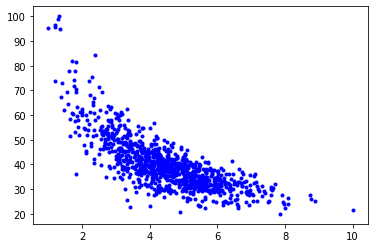

In [73]:
plt.plot(X,y, "b.")

**1.1 Divide los datos del costo de manufactura.** 

Utiliza la función train_test_split (viene el ejemplo al final del notebook)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

**1.2 Regresión Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada. 

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [78]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [79]:
yhat = linear_reg.predict(X_train)
yhat[0:5]

array([[39.28239104],
       [45.34361759],
       [48.6471974 ],
       [33.00334836],
       [35.81416506]])

In [80]:
linear_reg.intercept_

array([66.97622862])

In [81]:
linear_reg.coef_

array([[-6.00034747]])

**Modelo generado** 

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

por lo que tendriamos:

**Manufacturing Cost** =  -6.218 x **Number of units** + 67.890 

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


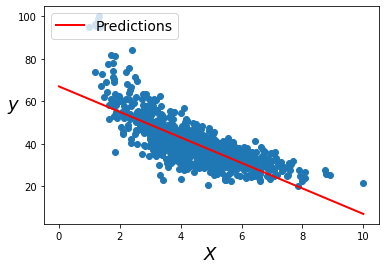

In [82]:
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores y R^2**

In [83]:
yhat_test = linear_reg.predict(X_test)
yhat_train = linear_reg.predict(X_train)

In [84]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))
print('r2_score',r2_score(y_test, yhat_test))


Error medio Absoluto (MAE): 4.642590742422353
Root Mean Squared Error: 6.767304611023221
r2_score 0.5725182609536665


**Regresión Polinomial**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [87]:
X_poly

array([[ 4.61537231, 21.30166155],
       [ 3.60522638, 12.99765728],
       [ 3.05466163,  9.3309577 ],
       ...,
       [ 1.62030979,  2.62540381],
       [ 6.09889652, 37.19653874],
       [ 3.18717054, 10.15805604]])

In [88]:
lin_reg_poly = LinearRegression(fit_intercept=True)
lin_reg_poly.fit(X_poly, y_train)
lin_reg_poly.coef_, lin_reg_poly.intercept_

(array([[-16.64876476,   1.14534054]]), array([89.60399933]))

**Modelo generado** 

$\hat{y} =  -16.648X +1.145X^2 + 89.603$